In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
from math import sin,cos
import random

# Лабораторная работа 1,Задание 1
Нахождение с помощью расширенного фильтра Калмана(EKF) отслеживаие ориентации и положения робота по наблюдениям ( подбробности модели в условиях лабораторной работы lab1)

In [8]:
# Радиусы колес
B = 4
# Шаг дискретизации
T = 0.003
# Угловые скорости колес
W_L = 5
W_R = 3
#Коэфиценты для угловых скоростей
a = 0.4
c = 0.4
# Угловые скорости колес
def u_R(k): return a * (k*T);
def u_L(k): return c * (k*T);
# Линейные скорости колес
def S_L(k): return W_L * u_L(k);
def S_R(k): return W_R * u_R(k);
# Скорость передвижения
def s_t(k): return (S_L(k) + S_R(k))/2;
# Скорость вращения
def s_r(k): return (S_R(k) - S_L(k))/(2*B)
# Функции движения
def r_t(t): return (-0.5*  W_L *c* t * t+ 0.5 *W_R * a *t * t)/(2 *B)
def x_t(t): return (W_L*c + W_R*a)*B*sin(((W_L*c - W_R*a)*t*t)/(4*B))/(W_L*c - W_R*a)
def y_t(t): return -(-W_L*c - W_R*a)*cos(((W_L*c - W_R*a)*t*t)/(4*B))*B/(W_L*c - W_R*a)
#Среднеквадратические отклонения шумов показаний
sigma_r = 0.62
sigma_x = 0.88
sigma_y = 1.09

Генерация истинной траектории дивжения

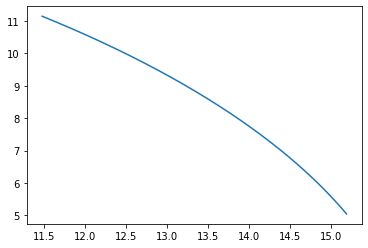

In [9]:

theta = np.arange(-5, -4, 0.0001)
r = [r_t(q) for q in theta]
x = [x_t(q) for q in theta]
y = [y_t(q) for q in theta]

fig1 = plt.figure(1)
axes1 = fig1.subplots(1, 1)
axes1.plot(x, y,label='parametric curve')

Генерация наблюдений 

In [10]:
theta = np.arange(-5, -4, T)
Y = []
for th in theta:
    rr = r_t(th) +  np.random.normal(0, sigma_r)
    xx = x_t(th) +  np.random.normal(0, sigma_x)
    yy = y_t(th) +  np.random.normal(0, sigma_y)
    Y.append(np.array([rr,xx,yy]))
axes1.plot([j[1] for j in Y], [j[2] for j in Y], 'o', color='black',ms=1);


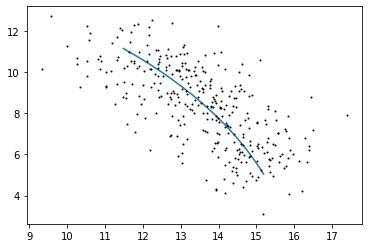

In [11]:
fig1

Процедура расстановления координат по наблюдениям - Расширенный Фильтр Калмана

In [12]:

m = []
P = []
m.append([r_t(-5),x_t(-5),y_t(-5)])
P.append([[3,0,0],[0,3,0],[0,0,3]])
for i in range(1,len(theta)):
    k = theta[i-1]/T
    m_ = np.array([m[i-1][0] + T * s_r(k), m[i-1][1] +  T * s_t(k)*cos(m[i-1][0])- T*T/2 *s_t(k) *s_r(k)*sin(m[i-1][0]),
                   m[i-1][2] + T* s_t(k)*sin(m[i-1][0])+T*T /2 *s_t(k)*s_r(k)*cos(m[i-1][0])])
    F_x = np.array([[1,0,-T*s_t(k) * sin (m[i-1][0]) -T*T /2 * s_t(k) *s_r(k) * cos(m[i-1][0])],
          [0,1, T * s_t(k) *  cos(m[i-1][0]) - T*T/2 * s_t(k)*s_r(k) * sin(m[i-1][0])],
          [0,0,1]])
    H_x = np.array([[1,0,0],[0,1,0],[0,0,1]]);
    p_ = np.dot(np.dot(F_x ,P[i-1]),  F_x.transpose())
    S = np.dot(np.dot(H_x,p_),H_x.transpose())+ np.array([[sigma_r,0,0],[0,sigma_x,0],[0,0,sigma_y]])
    K = np.dot(np.dot(p_ ,H_x.transpose()), np.linalg.inv(S))
    v = Y[i]  - m_;
    v = np.dot(K , v.transpose())
    v = v.tolist();
    m.append( m_  + v)
    P.append(p_  - np.dot(np.dot(K ,S),K.transpose()))
    

In [13]:
X =[]
for i in range(0,len(m)):
    X.append(np.random.multivariate_normal(m[i],P[i]))
x = [a[1] for a in X]
y = [a[2] for a in X]
axes1.plot(x, y,label='parametric curve')

Визуализация полученной траектории 

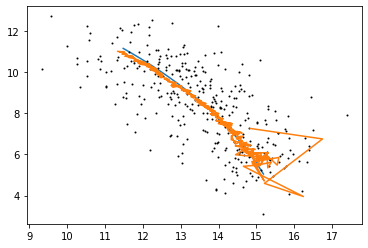

In [14]:
fig1